# Análise exploratória de dados espaciais (AEDE) - continuação

Nesse notebook:

1 plotar MG e Sul/Sudoeste de MG com diferentes divisões  
2 demonstrar autocorrelação espacial forte e fraca com a escolha de variáveis adequadas  
3 comparar o comportamento do Sul/Sudoeste de MG e 2 microrregiões quanto a alguma variável do atlas  

In [1]:
%matplotlib inline 
                    # para os gráficos aparecerem
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
import pysal as ps
import palettable
import nupis
import seaborn as sns
sns.set(style='whitegrid', palette='pastel') 

## A mesorregião Sul/Sudoeste de MG

In [2]:
# objeto ssm:  unir shapefile do Sul/Sudoeste de MG com dataframe atlas
# resultado: apenas informações (geográficas e do atlas) do Sul/Sudoeste de MG
ssm = nupis.mesclar_shp_df(shp='ssm.shp', df='atlas.csv') 
w_ssm = ps.queen_from_shapefile('ssm.shp')   # cria a matriz de vizinhaça no formato queen

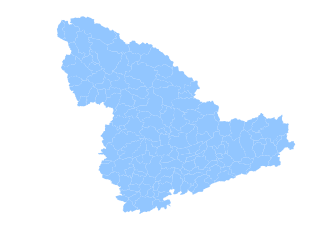

In [3]:
ssm.plot().set_axis_off();

## O estado de MG 

In [4]:
mg = nupis.mesclar_shp_df(shp='31MUE250GC_SIR.shp', df='atlas.csv')  # juntar shapefile com dataframe
w_mg = ps.queen_from_shapefile('31MUE250GC_SIR.shp')   # cria a matriz de vizinhaça no formato queen

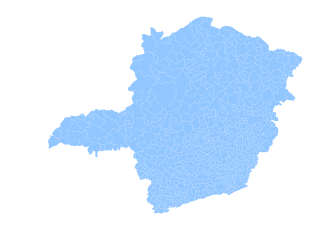

In [5]:
mg.plot().set_axis_off();

### 1 Plotar MG e Sul/Sudoeste de MG com diferentes divisões

**MG em mesorregiões**

In [46]:
mg.nome_meso.unique()

array(['Triângulo Mineiro/Alto Paranaíba', 'Central Mineira',
       'Zona da Mata', 'Vale do Rio Doce', 'Oeste de Minas',
       'Vale do Mucuri', 'Norte de Minas', 'Sul/Sudoeste de Minas',
       'Campo das Vertentes', 'Jequitinhonha',
       'Metropolitana de Belo Horizonte', 'Noroeste de Minas'], dtype=object)

In [47]:
len(mg.nome_meso.unique())

12

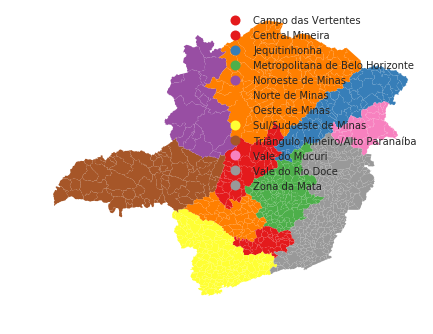

In [48]:
# mapa de MG dividido por mesorregiões
ax = mg.plot(column='nome_meso',
             linewidth=0, figsize=(7,7), legend=True, cmap='Set1')
ax.set_axis_off()

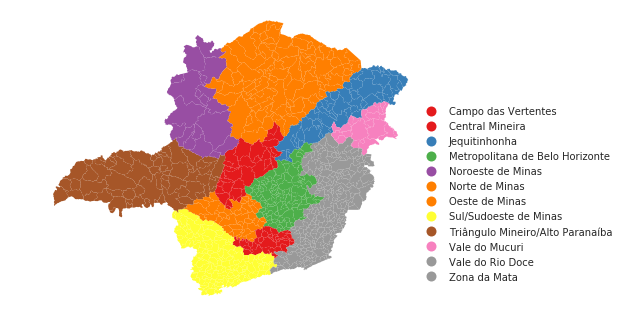

In [49]:
# alterando opções da legenda
ax = mg.plot(column='nome_meso',
             linewidth=0, figsize=(7,7), legend=True, cmap='Set1')
ax.set_axis_off()

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.5, 0.7)); # alterar valores de x e y: posição

**MG em microrregiões**

In [50]:
# mostrar quais as microrregiões existem em MG


In [51]:
# quantas microrregiões existem?


In [52]:
# mapa de MG dividido por microrregiões



**Sul/Sudoeste de MG em microrregiões**

In [53]:
ssm.nome_micro.unique()

array(['Andrelândia', 'São Lourenço', 'Poços de Caldas', 'Alfenas',
       'Passos', 'São Sebastião do Paraíso', 'Varginha', 'Pouso Alegre',
       'Itajubá', 'Santa Rita do Sapucaí'], dtype=object)

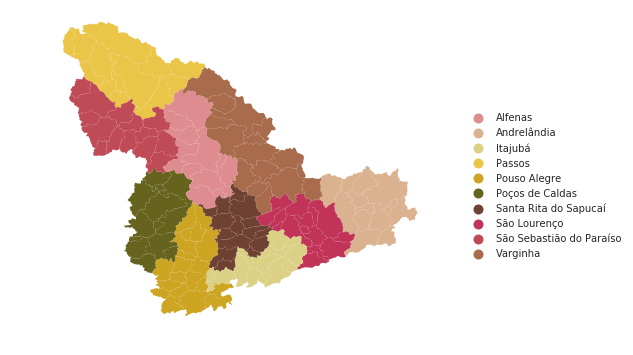

In [54]:
# mapa do Sul/Sudoeste de MG dividido por microrregiões
x = palettable.wesanderson.Moonrise5_6.mpl_colormap
ax = ssm.plot(column='nome_micro',
             linewidth=0, figsize=(7,7), legend=True, cmap=x)
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.5, 0.7));

**Sul/Sudoeste de MG em municípios**

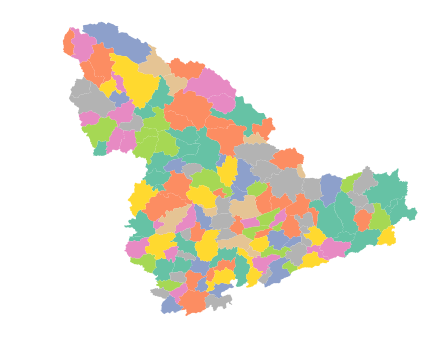

In [55]:
# mapa do Sul/Sudoeste de MG dividido por municípios
ax = ssm.plot(column='mun', linewidth=0, figsize=(7,7), legend=False, cmap='Set2')
ax.set_axis_off()

### 2 Demonstrar autocorrelação espacial forte e fraca com a escolha de variáveis adequadas  

Para criar autocorrelação espacial artificial usaremos variáveis que não fariam sentido analisar, mas que ajudam na compreensão da ideia de concentração espacial.

## Estado de MG

Autocorrelação forte: usar como variável o código da mesorregião e fazer para MG

In [56]:
mg.columns

Index(['NM_MUNICIP', 'mun', 'geometry', 'nome_mun', 'nome_uf', 'uf', 'rm',
       'meso', 'nome_meso', 'micro', 'nome_micro', 'espvida', 'fectot',
       'mort1', 'razdep', 't_env', 'e_anosestudo', 't_analf25m', 't_flbas',
       't_flfund', 't_flmed', 't_flpre', 't_flsuper', 'pind', 'pmpob',
       'pren10ricos', 'pren20', 'pren20ricos', 'pren40', 'pren60', 'pren80',
       'r1040', 'r2040', 'rdpc', 'cpr', 'emp', 'p_agro', 'p_com', 'p_constr',
       'p_extr', 'p_formal', 'p_fund', 'p_med', 'p_serv', 'p_siup', 'p_super',
       'p_transf', 'ren0', 'ren1', 'ren2', 'ren3', 'ren5', 'renocup', 'trabcc',
       'trabpub', 'trabsc', 't_agua', 't_banagua', 't_dens', 't_lixo', 't_luz',
       'parede', 't_m10a14cf', 't_m15a17cf', 't_mulchefefif014',
       't_nestuda_ntrab_mmeio', 't_des', 't_fund25m', 't_med25m', 't_super25m',
       't_ativ', 't_urb', 'popul', 'porte', 'vab_agro', 'vab_ind', 'vab_serv',
       'vab_adm', 'vab_total', 'impostos', 'pib', 'pibpc'],
      dtype='object')

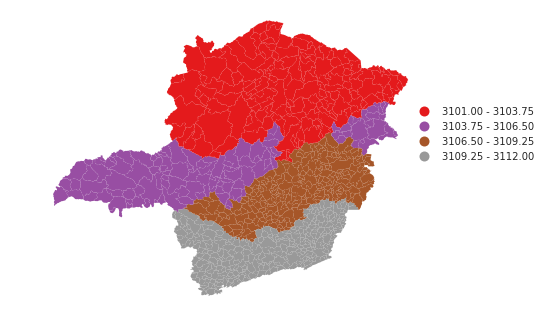

In [57]:
# mapa temático da variável meso
ax = mg.plot(column='meso', scheme='equal_interval', k=4,
             linewidth=0, figsize=(7,7), legend=True, cmap='Set1')
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3, 0.7));

In [58]:
# I de Moran global usando como variável o código da mesorregião
IM_meso = ps.Moran(mg.meso, w_mg)
nupis.moran_resumo(IM_meso)   # função do nupis que retorna uma saída organizada do I de Moran

Moran Rate Summary Report
I        0.957   observed value of Moran’s I
EI_sim   -0.001   average value of I from permutations  
p_sim     0.001   p-value based on permutations


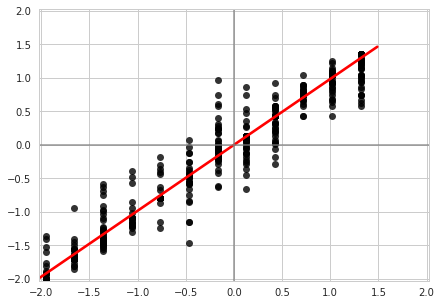

In [59]:
# diagrama de dispersão de Moran do código da mesorregião
nupis.moran_dispersao(IM_meso)

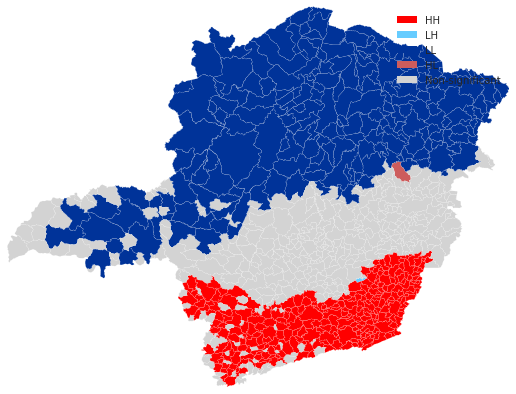

In [60]:
# mapa LISA com os códigos das mesorregiões
nupis.lisa_mapa(mg.meso, '31MUE250GC_SIR.shp', p_thres=0.05)

<br>
<br>
Autocorrelação fraca: códigos dos municipios

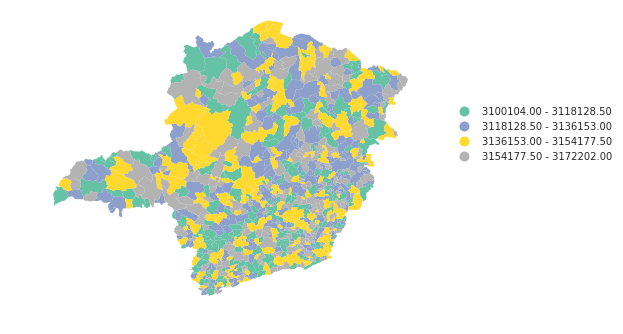

In [61]:
# mapa temático da variável mun (código dos municípios)
ax = mg.plot(column='mun', scheme='equal_interval', k=4,
             linewidth=0, figsize=(7,7), legend=True, cmap='Set2')
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.5, 0.7));

In [62]:
# I de Moran global usando os códigos dos municípios
IM_mun = ps.Moran(mg.mun, w_mg)  # variável no dataframe e matriz de vizinhança 
nupis.moran_resumo(IM_mun)   # função do nupis que retorna uma saída organizada do I de Moran

Moran Rate Summary Report
I        0.013   observed value of Moran’s I
EI_sim   -0.001   average value of I from permutations  
p_sim     0.247   p-value based on permutations


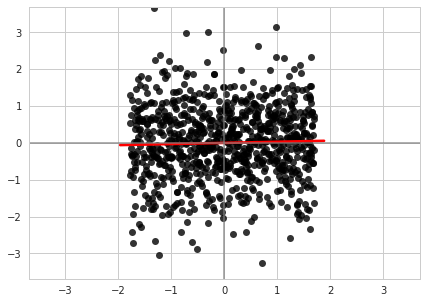

In [63]:
# diagrama de dispersão de Moran para os códigos dos municípios
nupis.moran_dispersao(IM_mun)

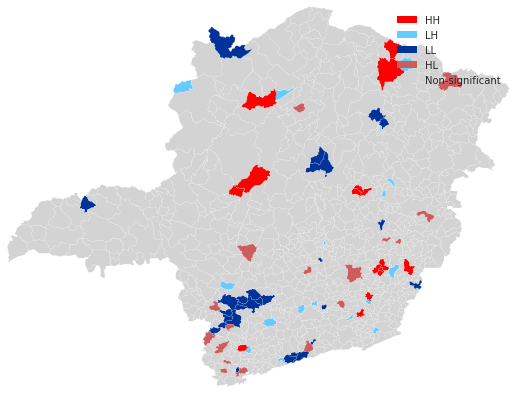

In [64]:
# mapa LISA com os códigos dos municípios
nupis.lisa_mapa(mg.mun, '31MUE250GC_SIR.shp', p_thres=0.05)

## Sul/Sudoeste de MG

### Autocorrelação espacial artificial

Gerar exemplos artificiais com o objeto ssm: gerar a análise com autocorrelação forte (microrregiões) e inexistente (código dos municípios), gerando:
- mapas temáticos
- autocorrelação forte: valor de I global, significância, diagrama de dispersão de Moran e mapa LISA
- autocorrelação fraca: valor de I global, significância, diagrama de dispersão de Moran e mapa LISA


Autocorrelação forte: usar como variável o código da microrregião

In [65]:
# mapa temático da variável micro



In [66]:
# I de Moran global da variável código da microrregião para o Sul/Sudoeste de MG



In [67]:
# diagrama de dispersão de Moran da variável código da microrregião para o Sul/Sudoeste de MG


In [68]:
# Mapa LISA da variável código da microrregião para o Sul/Sudoeste de MG


<br>
<br>
Autocorrelação fraca: códigos dos municipios

In [69]:
# mapa temático da variável mun (código dos municípios)



In [70]:
# I de Moran global da variável código do município para o Sul/Sudoeste de MG



In [71]:
# diagrama de dispersão de Moran da variável código do município para o Sul/Sudoeste de MG


In [72]:
# mapa LISA da variável código do município para o Sul/Sudoeste de MG


### 3 Comparar o comportamento do Sul/Sudoeste de MG e 2 microrregiões quanto a alguma variável do atlas  

**Tarefa:**

Escolher uma variável, comparar seu comportamento no sul de MG com o de 2 microrregiões do sul de MG, obtendo:
- mapa temático  
- valor de I global e significância  
- diagrama de dispersão de Moran  
- mapa LISA

**Sul/Sudoeste de MG**

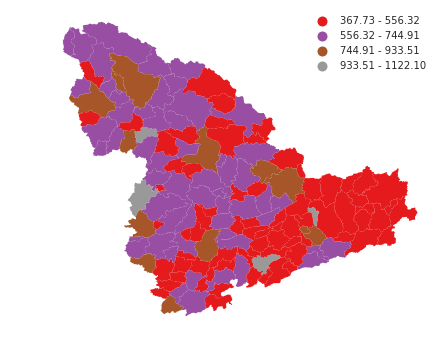

In [73]:
# mapa temático rdpc
nupis.mapa(ssm, 'rdpc')

In [74]:
# I de Moran
IM = ps.Moran(ssm.rdpc, w_ssm)
nupis.moran_resumo(IM)

Moran Rate Summary Report
I        0.153   observed value of Moran’s I
EI_sim   -0.010   average value of I from permutations  
p_sim     0.003   p-value based on permutations


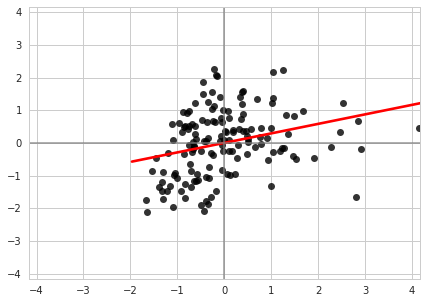

In [75]:
# diagrama de dispersão de Moran
nupis.moran_dispersao(IM)

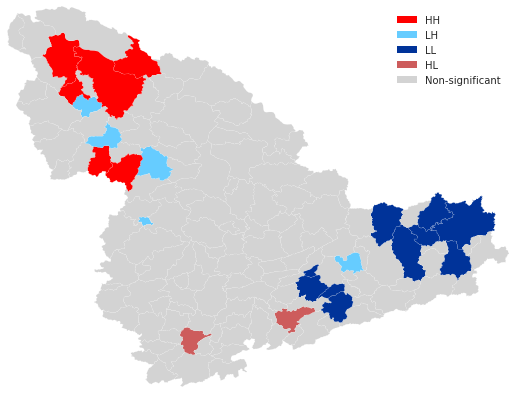

In [76]:
# mapa LISA
nupis.lisa_mapa(ssm.rdpc, 'ssm.shp', p_thres=0.05)

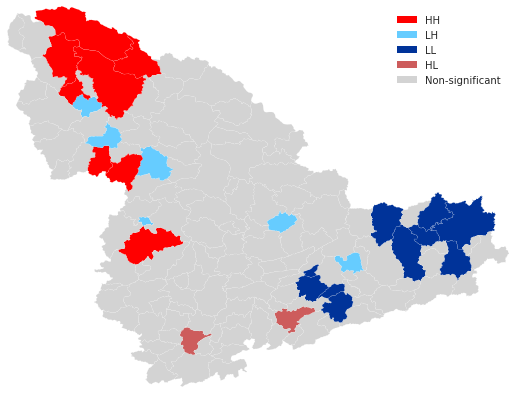

In [77]:
# mapa LISA
# usando código da função nupis.lisa_mapa diretamente
# permitindo alterar opções
w_ssm = ps.queen_from_shapefile('ssm.shp')
lisa = ps.Moran_Local(ssm.rdpc, w_ssm)
fig = plt.figure(figsize=(9, 7))
shp = ps.open('ssm.shp')
import pysal.contrib.viz.mapping as maps
base = maps.map_poly_shp(shp)
base = maps.base_lisa_cluster(base, lisa, p_thres=0.05)
base.set_edgecolor('1')
base.set_linewidth(0.1)
ax = maps.setup_ax([base], [shp.bbox])

boxes, labels = maps.lisa_legend_components(lisa, p_thres=0.05)
plt.legend(boxes, labels, fancybox=True, bbox_to_anchor=(1, 1))

plt.show();

## Microrregiões do Sul/Sudoeste de MG

In [78]:
ssm.nome_micro.unique()

array(['Andrelândia', 'São Lourenço', 'Poços de Caldas', 'Alfenas',
       'Passos', 'São Sebastião do Paraíso', 'Varginha', 'Pouso Alegre',
       'Itajubá', 'Santa Rita do Sapucaí'], dtype=object)

Para escolher microrregiões:

In [79]:
pocos = ssm.query('nome_micro == "Poços de Caldas"')
pocos

,mun,NM_MUNICIP,meso,geometry,nome_mun,nome_uf,uf,rm,meso_y,nome_meso,...,popul,porte,vab_agro,vab_ind,vab_serv,vab_adm,vab_total,impostos,pib,pibpc
2,3101409,ALBERTINA,3110,POLYGON ((-46.53304299999996 -22.1854929966603...,Albertina,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,2899,pequenoI,3999.848,1126.993,13135.272,9428.222,27690.336,3125.804,30816.140,10578.83
6,3102605,ANDRADAS,3110,POLYGON ((-46.56531299999995 -21.9333449966544...,Andradas,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,37150,pequenoII,58370.211,92078.546,196381.436,79393.239,426223.432,57449.815,483673.247,12966.42
12,3105301,BANDEIRA DO SUL,3110,POLYGON ((-46.37393399999998 -21.6932319966486...,Bandeira do Sul,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,5313,pequenoI,2734.031,6030.875,14049.654,11703.054,34517.614,2316.642,36834.256,6897.80
19,3108404,BOTELHOS,3110,POLYGON ((-46.32250099999992 -21.5731909966458...,Botelhos,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,14821,pequenoI,26255.132,8877.464,45002.820,31636.555,111771.970,6863.463,118635.434,7943.45
24,3110301,CALDAS,3110,POLYGON ((-46.39656600000001 -21.7597479956502...,Caldas,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,13541,pequenoI,24295.390,18247.842,48953.592,27860.896,119357.720,9491.654,128849.374,9453.37
29,3111002,CAMPESTRE,3110,POLYGON ((-46.17433199999998 -21.5816529966459...,Campestre,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,20546,pequenoII,59859.438,15869.422,75694.051,39358.197,190781.108,13245.169,204026.276,9855.87
70,3129905,IBITIÚRA DE MINAS,3110,POLYGON ((-46.39471100000001 -22.0136019966563...,Ibitiúra de Minas,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,3382,pequenoI,7778.781,1910.015,9975.920,8767.105,28431.821,1541.400,29973.221,8800.12
72,3130606,INCONFIDENTES,3110,"POLYGON ((-46.235343 -22.26733099666229, -46.2...",Inconfidentes,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,6905,pequenoI,8119.396,10360.518,16457.758,15899.366,50837.038,4103.978,54941.015,7957.85
81,3134905,JACUTINGA,3110,POLYGON ((-46.50621399999994 -22.3408899966639...,Jacutinga,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,22610,pequenoII,23054.548,65226.512,128581.556,53186.512,270049.128,37414.094,307463.223,13487.00
93,3143401,MONTE SIÃO,3110,POLYGON ((-46.42316299999993 -22.3993329966652...,Monte Sião,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,21033,pequenoII,14543.189,34671.645,116532.082,49725.836,215472.753,22105.270,237578.023,11204.92


In [80]:
pocos.to_file('pocos.shp')    # salvar o shapefile da microrregião
w = ps.queen_from_shapefile('pocos.shp') # calcular a matriz de vizinhança

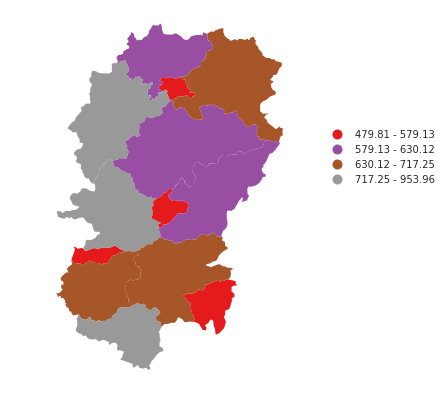

In [81]:
# mapa temático rdpc
ax = pocos.plot(column='rdpc', scheme='quantiles', k=4,
             linewidth=0, figsize=(7,7), legend=True, cmap='Set1')
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.6, 0.7));

In [82]:
# I de Moran
IM = ps.Moran(pocos.rdpc, w)
nupis.moran_resumo(IM)

Moran Rate Summary Report
I       -0.113   observed value of Moran’s I
EI_sim   -0.084   average value of I from permutations  
p_sim     0.447   p-value based on permutations


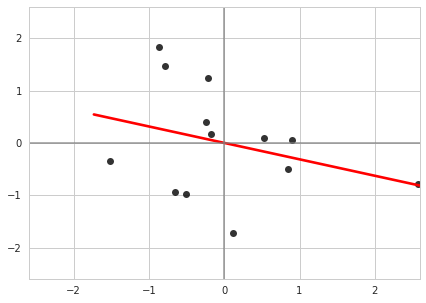

In [83]:
# diagrama de dispersão de Moran
nupis.moran_dispersao(IM)

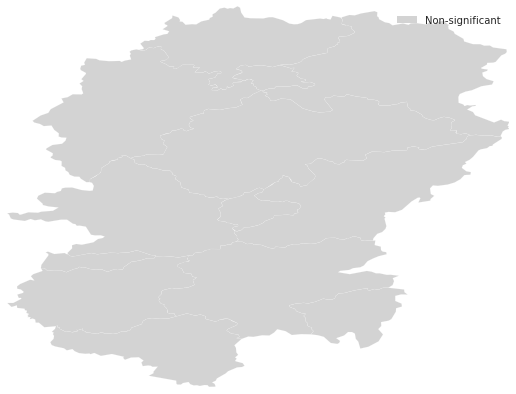

In [84]:
# mapa LISA
nupis.lisa_mapa(pocos.rdpc, 'pocos.shp', p_thres=0.05)

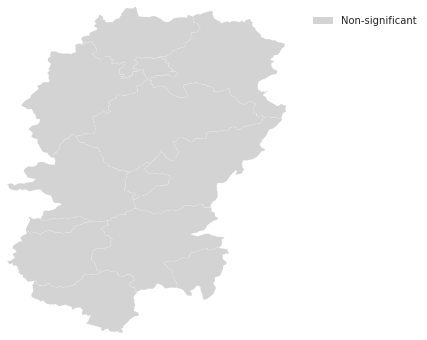

In [85]:
# usando código da função nupis.lisa_mapa diretamente
w = ps.queen_from_shapefile('pocos.shp')
lisa = ps.Moran_Local(pocos.rdpc, w)
fig = plt.figure(figsize=(5, 6))
shp = ps.open('pocos.shp')
import pysal.contrib.viz.mapping as maps
base = maps.map_poly_shp(shp)
base = maps.base_lisa_cluster(base, lisa, p_thres=0.05)
base.set_edgecolor('1')
base.set_linewidth(0.1)
ax = maps.setup_ax([base], [shp.bbox])

boxes, labels = maps.lisa_legend_components(lisa, p_thres=0.05)
plt.legend(boxes, labels, fancybox=True, bbox_to_anchor=(1.5, 1))

plt.show();

<br>
<br>
<br>

Escolher outra microrregião e fazer o mesmo:

In [40]:
# criar data frame usando query


In [41]:
# criar shapefile e matriz w


In [42]:
# mapa temático da variável para a microrregião



In [43]:
# I de Moran



In [44]:
# diagrama de dispersão de Moran



In [45]:
# mapa LISA

